In [1]:
import graph_tool.all as gt
import pandas as pd
import numpy as np

# Load table

In [2]:
cite = pd.read_csv('../../data/processed/cites_2.csv')

In [3]:
chunk = cite[cite.s_year==2011]

In [4]:
deg = chunk.groupby('target').size().rename('N').reset_index()

In [5]:
sc = deg[deg.N >= deg.N.mean() + 1.5 * (deg.N.quantile(.75) - deg.N.quantile(.25))]['target'].values

In [6]:
df_w = chunk.groupby(['source', 'target']).size().rename('weight').reset_index()

In [7]:
df_g = chunk.groupby(['source', 'target'])[['gender', 'gender_s']].first().reset_index()

In [8]:
df_g['inter'] = df_g['gender'] != df_g['gender_s']

In [9]:
df_w = pd.merge(df_w, df_g[['source', 'target', 'inter']], how='left')

In [10]:
g = gt.Graph()
weight = g.new_ep('int')
inter = g.new_ep('boolean')

edgelist = df_w.values

node_id = g.add_edge_list(edgelist, hashed=True, eprops=[weight, inter])

In [11]:
color = g.new_vp('string')

for v in g.get_vertices():
    if node_id[v] in sc:
        color[v] = 'red'
    else:
        color[v] = 'white'

In [12]:
h = gt.GraphView(g, vfilt=gt.label_largest_component(g))

In [15]:
pos = gt.sfdp_layout(h)

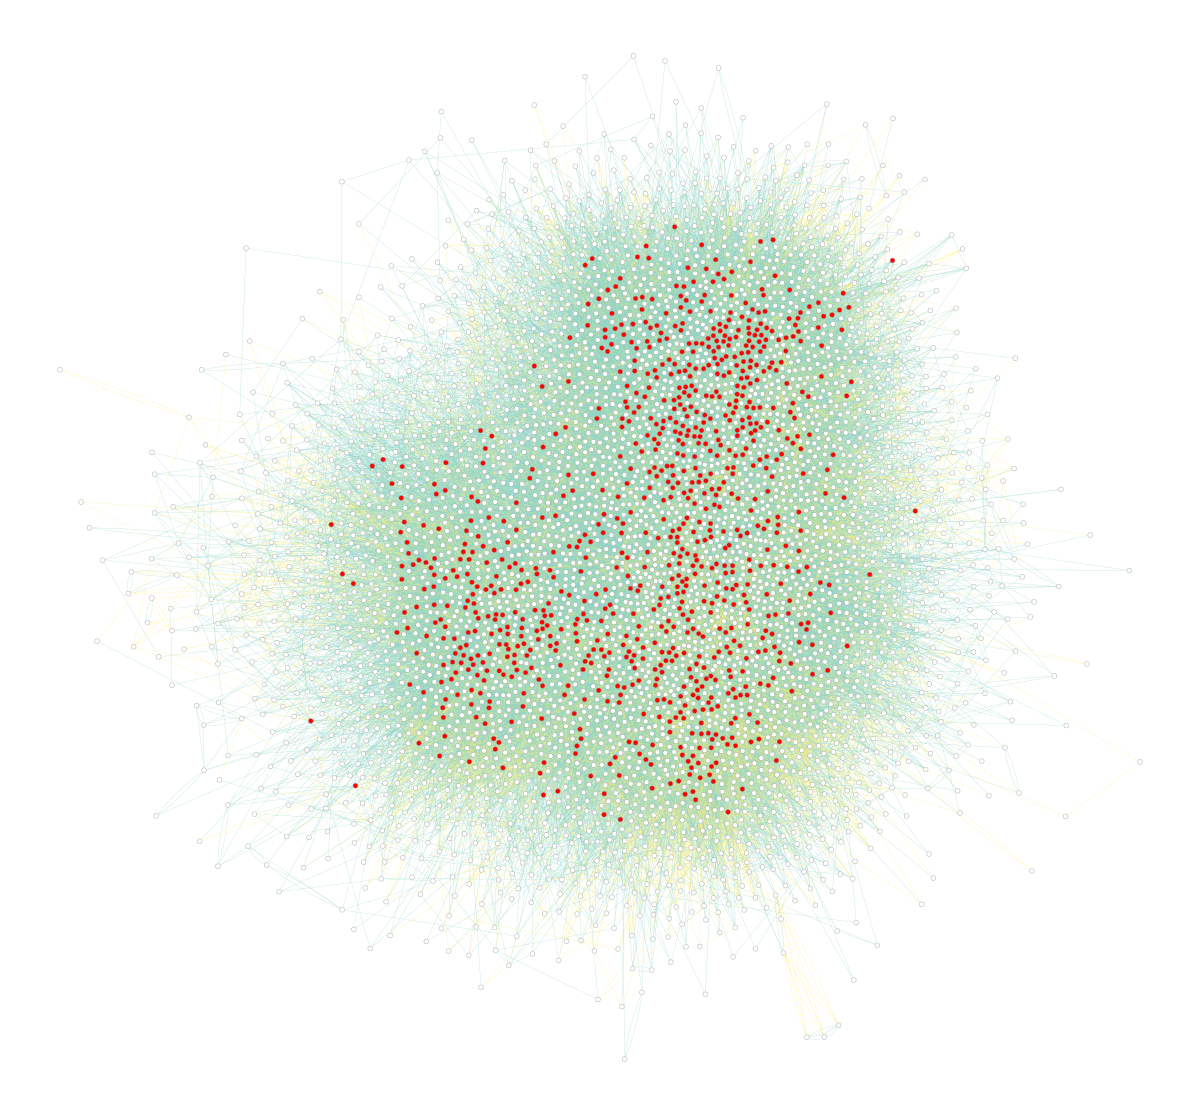

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fcb01b2edf0, at 0x7fcae8e91580>

In [16]:
gt.graph_draw(h, pos=pos, vertex_fill_color=color, edge_pen_width=0.1,
              edge_color=inter)